In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine



In [36]:
engine = create_engine('postgresql://postgres:JPH401@mc@localhost:5432/PH_Employees_DB')
connection = engine.connect()


# Create a histogram to visualize the most common salary ranges for employees.

In [37]:
salaries =pd.read_sql('select * from salaries', connection)
salaries.describe()


,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


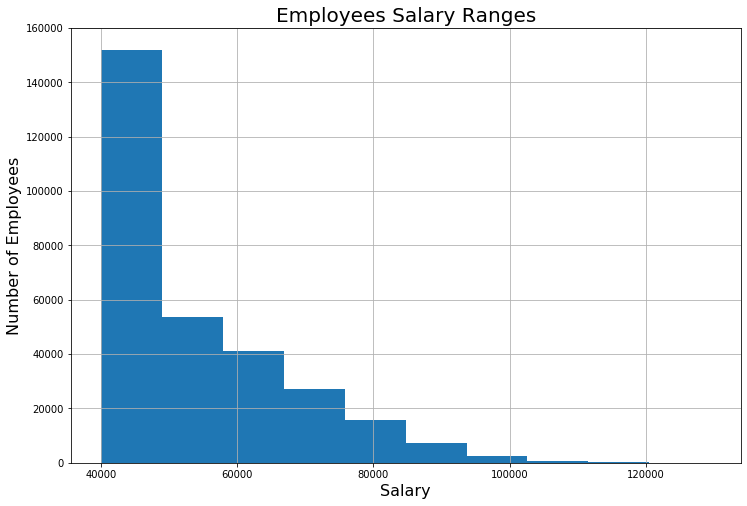

In [38]:
salaries.hist(column="salary",bins=10,figsize=[12,8])
#plt.xlim([0,13000])
plt.ylim([0,160000])
plt.title("Employees Salary Ranges",size = 20)
plt.xlabel("Salary", size = 16)
plt.ylabel("Number of Employees", size = 16)
plt.show()

# Create a bar chart of average salary by title

In [77]:
salaries =pd.read_sql('select * from salaries', connection)
salaries.head()
employees =pd.read_sql('select * from employees', connection)
employees.head()
emp_salary = pd.merge(employees,salaries, on=['emp_no'])
emp_salary.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [78]:
titles = emp_salary['emp_title_id'].value_counts()
titles

s0001    107384
e0003     97747
e0002     47303
s0002     26583
e0004     15148
e0001      5835
m0001        24
Name: emp_title_id, dtype: int64

In [79]:
emp_salary_df = pd.DataFrame(emp_salary)
emp_salary_gr = emp_salary_df.groupby(['emp_title_id']).mean()
emp_salary_gr = emp_salary_gr.drop(columns=["emp_no"])
emp_salary_gr

,salary
emp_title_id,
e0001,48564.434447
e0002,48535.336511
e0003,48506.799871
e0004,48582.896092
m0001,51531.041667
s0001,58465.382850
s0002,58550.172704


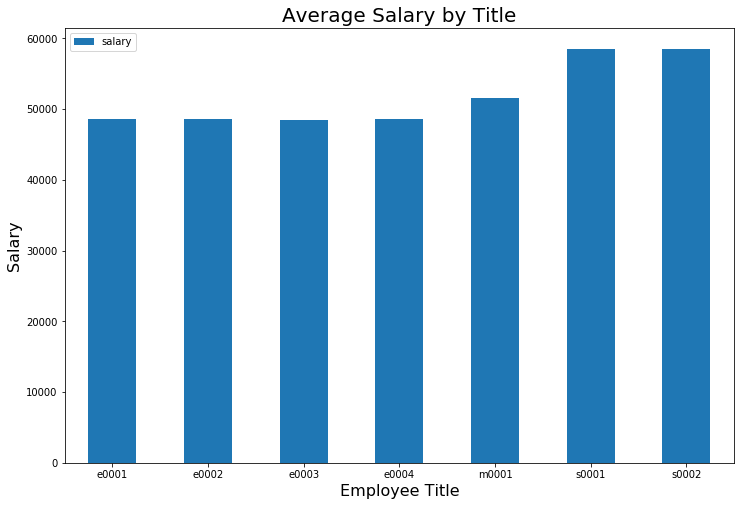

In [90]:
emp_salary_gr.plot(kind='bar', rot=0,figsize=[12,8])
plt.xlabel("Employee Title",size=16)
plt.ylabel("Salary",size=16)
plt.title("Average Salary by Title",size= 20)
plt.show();


# "Search your ID number."

In [82]:
ID =pd.read_sql('select * from employees Where emp_no = 499942', connection)
ID

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
